# Titanic Survival Prediction using tensorflow.
## This notebook walks through some data anylsis of the titanic dataset and then creates a tensorflow classification model.

Load libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  InputLayer
from tensorflow.keras.layers import  Dense

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

## Load and explore data

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

## Explore data and analyse, identify patterns

In [9]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


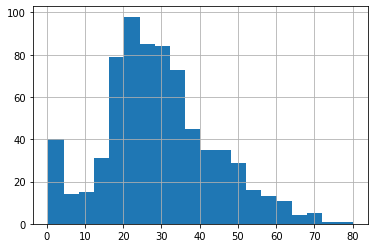

In [12]:
df.Age.hist(bins=20)

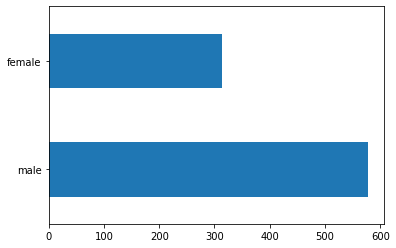

In [13]:
df.Sex.value_counts().plot(kind='barh')

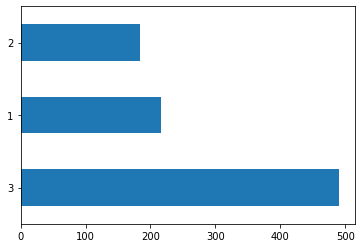

In [14]:
df['Pclass'].value_counts().plot(kind='barh')

Text(0.5, 0, 'Fraction survive')

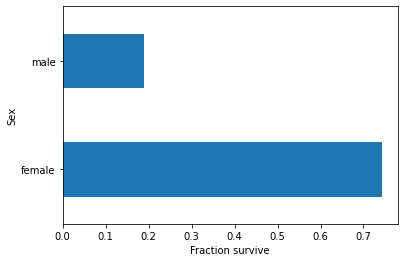

In [15]:
df.groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('Fraction survive')

Text(0.5, 0, 'Fraction survive')

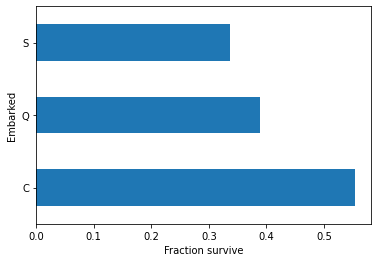

In [16]:
df.groupby('Embarked').Survived.mean().plot(kind='barh').set_xlabel('Fraction survive')

In [17]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
B4             1
D56            1
A31            1
F G63          1
C91            1
Name: Cabin, Length: 147, dtype: int64

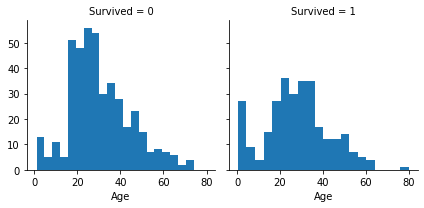

In [18]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


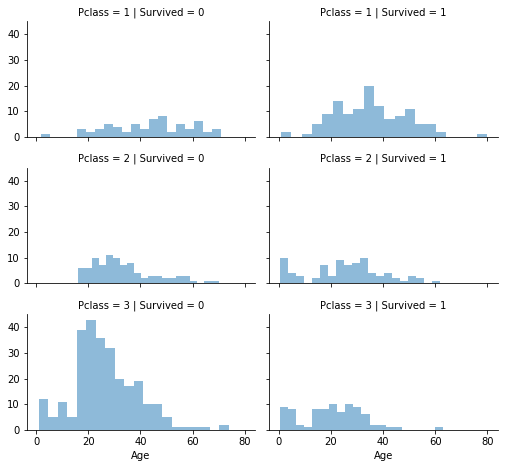

In [19]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


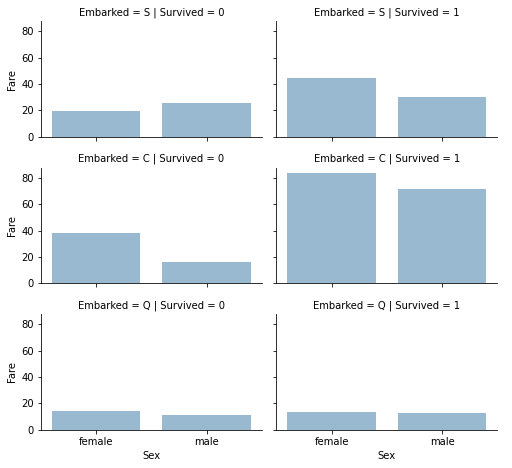

In [20]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Data wrangling

Create titles column and wrangle

In [21]:
df['Title'] =df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [23]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Find and replace missing data with mean/mode values

In [25]:
df = df.fillna(value={"Age":df.Age.mean(), "Cabin": df.Cabin.value_counts().index[0], "Embarked": df.Embarked.value_counts().index[0]})

In [26]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

Based on assumptions and data wrangling, going to drop 'Ticket' column as is just a ticket number.
Also going to drop 'Cabin' column as nearly all values are the same.
Create a feature dataframes with relevant columns

In [28]:
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Embarked']

In [29]:
features = df[feature_columns]

Labels dataframe creation

In [30]:
y = df['Survived']

In [31]:
features.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Title        object
Embarked     object
dtype: object

In [32]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked
0,3,male,22.0,1,0,7.2500,Mr,S
1,1,female,38.0,1,0,71.2833,Mrs,C
2,3,female,26.0,0,0,7.9250,Miss,S
3,1,female,35.0,1,0,53.1000,Mrs,S
4,3,male,35.0,0,0,8.0500,Mr,S


One-hot-encoding to creae binary columns for categorical variables

In [33]:
features = pd.get_dummies(features)

In [34]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,1


Split into Train/Test datasets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=43)

In [36]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
826,3,29.699118,0,0,56.4958,0,1,0,0,1,0,0,0,0,1
838,3,32.000000,0,0,56.4958,0,1,0,0,1,0,0,0,0,1
763,1,36.000000,1,2,120.0000,1,0,0,0,0,1,0,0,0,1
189,3,36.000000,0,0,7.8958,0,1,0,0,1,0,0,0,0,1
109,3,29.699118,1,0,24.1500,1,0,0,1,0,0,0,0,1,0


Normalize numerical columns in dataset. Done with ColumnTransformer from scikit-learn library. Returns a numpy array so needs converting back to pandas dataframe.

In [37]:
ct = ColumnTransformer([('normalize', Normalizer(), ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])], remainder='passthrough')

In [38]:
X_train_norm = ct.fit_transform(X_train)
X_test_norm = ct.transform(X_test)


In [39]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [40]:
X_train_norm.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.046951,0.464798,0.000000,0.000000,0.884171,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.046155,0.492321,0.000000,0.000000,0.869189,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.007980,0.287293,0.007980,0.015961,0.957643,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.081130,0.973562,0.000000,0.000000,0.213529,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.078106,0.773231,0.026035,0.000000,0.628757,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
le=LabelEncoder()

In [42]:
y_train=le.fit_transform(y_train.astype(str))
y_test=le.transform(y_test.astype(str))

In [43]:
y_train = tensorflow.keras.utils.to_categorical(y_train, dtype= "int64")
print(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test, dtype="int64")

[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [1 0]]


## Model Design
#### Input Layer - Must be the same shape as length of features column.
#### Add hidden layers
#### Add output layer using sigmoid activation function and binary cross-entropy loss.

In [71]:
def create_model(features):
  model = Sequential(name = "my_first_model")
  input = InputLayer(input_shape=(features.shape[1],))
  #add an input layer
  model.add(input)
  model.add(Dense(64, activation='relu'))
  model.add(tensorflow.keras.layers.Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  odel.add(tensorflow.keras.layers.Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  #add an output layer
  model.add(Dense(2, activation='sigmoid'))
  opt = Adam(learning_rate=0.001)
  model.compile(loss="binary_crossentropy", metrics=["mae"], optimizer=opt)
  return model



In [72]:
model = create_model(features)

NameError: ignored

Fit data

In [73]:
model.fit(X_train_norm, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4109 - mae: 0.2565
Epoch 2/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4047 - mae: 0.2537
Epoch 3/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4027 - mae: 0.2553
Epoch 4/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4018 - mae: 0.2537
Epoch 5/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4161 - mae: 0.2559
Epoch 6/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4029 - mae: 0.2567
Epoch 7/20
712/712 [==============================] - 1s 2ms/step - loss: 0.4063 - mae: 0.2541
Epoch 8/20
712/712 [==============================] - 1s 1ms/step - loss: 0.4019 - mae: 0.2486
Epoch 9/20
712/712 [==============================] - 1s 2ms/step - loss: 0.3972 - mae: 0.2502
Epoch 10/20
712/712 [==============================] - 1s 1ms/step - loss: 0.3966 - mae: 0.2465
Epoch 11/20
712/712 [============================

Predictions

In [74]:
y_estimate = model.predict(X_test_norm)
#print(classification_report(y_test, yhat_classes))

In [75]:
yhat_classes = np.argmax(y_estimate, axis=1)

In [76]:
yhat_classes

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1])

In [77]:
y_true = np.argmax(y_test, axis=1)

In [78]:
y_true

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

Classification report

In [79]:
print(classification_report(y_true, yhat_classes))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.59      0.67        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



In [80]:
def plot_heatmap(class_names, y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    plt.show()

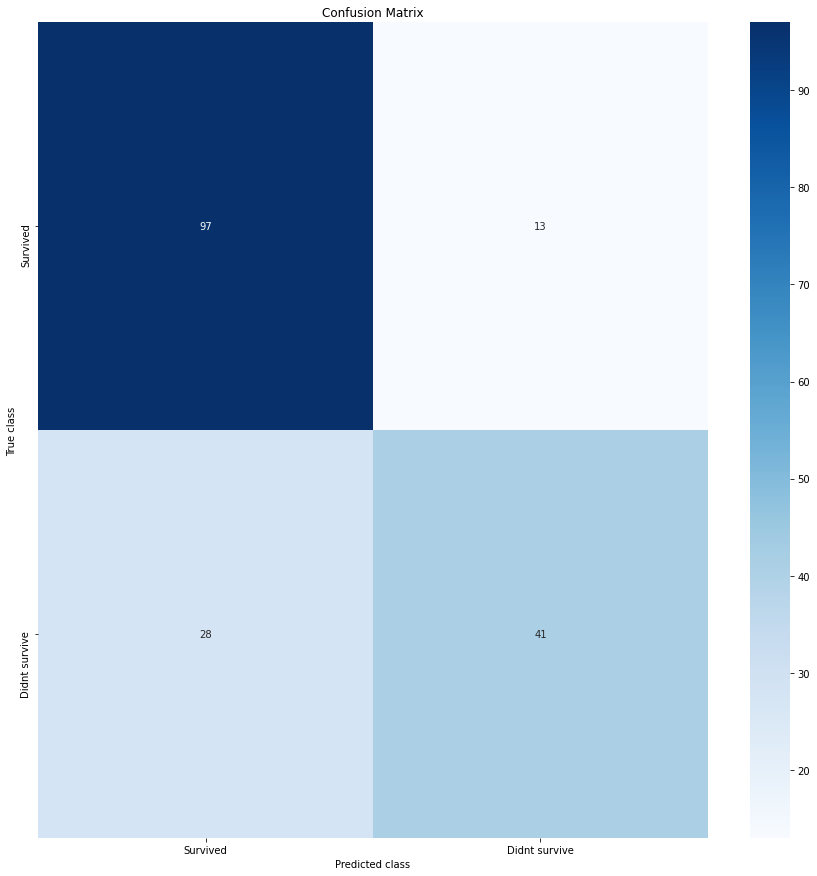

In [81]:
 class_names = ['Survived', 'Didnt survive']
 plot_heatmap(class_names, yhat_classes, y_true)